# Exploratory Spatio-Temporal Data Analysis
# Part 4 - Descriptive Statistics - Weekly Summary Statistics

In [1]:
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
ds = xr.open_dataset('data/preprocessed_power_nasa_data.nc')

In [3]:
ds

<xarray.Dataset> Size: 169MB
Dimensions:            (timestamp: 8369, lat: 18, lon: 10)
Coordinates:
  * lat                (lat) float64 144B 5.0 5.5 6.0 6.5 ... 12.5 13.0 13.5
  * lon                (lon) float64 80B 36.25 36.88 37.5 ... 40.62 41.25 41.88
  * timestamp          (timestamp) datetime64[ns] 67kB 2001-01-01 ... 2023-11-30
Data variables: (12/14)
    PRECTOTCORR        (timestamp, lat, lon) float64 12MB ...
    EVPTRNS            (timestamp, lat, lon) float64 12MB ...
    T2M                (timestamp, lat, lon) float64 12MB ...
    TS                 (timestamp, lat, lon) float64 12MB ...
    CLOUD_AMT          (timestamp, lat, lon) float64 12MB ...
    PS                 (timestamp, lat, lon) float64 12MB ...
    ...                 ...
    QV2M               (timestamp, lat, lon) float64 12MB ...
    RH2M               (timestamp, lat, lon) float64 12MB ...
    ALLSKY_SFC_SW_DWN  (timestamp, lat, lon) float64 12MB ...
    GWETROOT           (timestamp, lat, lon) float64 12MB ...
    GWETPROF           (timestamp, lat, lon) float64 12MB ...
    GWETTOP            (timestamp, lat, lon) float64 12MB ...

In [4]:
def decompose_seasonality_weekly(ds, variable_name):
    """
    Decomposes a given variable from an xarray.Dataset to analyze weekly seasonality.
    
    Parameters:
    - ds (xarray.Dataset): The dataset containing the variable.
    - variable_name (str): The name of the variable to analyze.
    
    This function performs the following steps:
    1. Averages the variable over latitude and longitude dimensions.
    2. Corrects negative values by setting them to zero.
    3. Converts the xarray.DataArray to a pandas DataFrame.
    4. Resamples the data to weekly averages.
    5. Applies seasonal decomposition on the weekly data.
    6. Plots the observed data, trend, seasonal, and residual components.
    
    Returns:
    - None: Plots the decomposition components.
    """
    
    # Check if the variable exists in the dataset
    if variable_name not in ds.variables:
        raise ValueError(f"Variable {variable_name} not found in the dataset.")
    
    # Average over the latitude and longitude dimensions
    data = ds[variable_name].mean(dim=['lat', 'lon'])

    # Correct negative values by setting them to zero
    data = data.where(data >= 0, 0)

    # Convert to pandas DataFrame for easier handling in statsmodels
    data_df = data.to_dataframe(name=variable_name).dropna()

    # Resample to weekly averages
    weekly_data = data_df.resample('W').mean()

    # Decompose the time series to weekly data
    # The `period` parameter should be 7 for weekly decomposition assuming daily data
    decomposition = seasonal_decompose(weekly_data, model='additive', period=7)

    # Plot the decomposed components
    fig, axes = plt.subplots(4, 1, figsize=(12, 8))
    titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
    for ax, component, title in zip(axes, [decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], titles):
        component.plot(ax=ax, title=title)
        ax.set_ylabel(variable_name)
        ax.label_outer()  # Hide x-labels for top 3 plots for clarity
    plt.tight_layout()
    plt.show()
    
# Usage example:
# decompose_seasonality_weekly(ds, 'PRECTOTCORR')


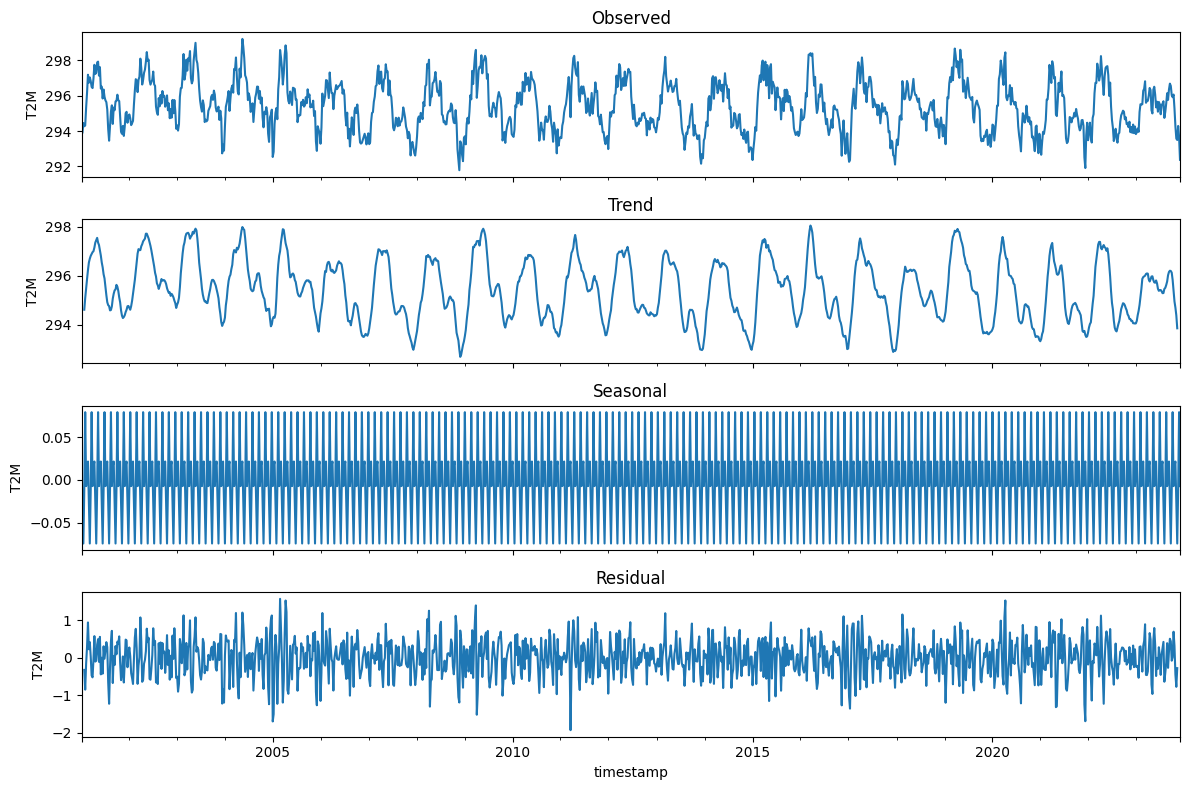

In [5]:
# Usage example:
decompose_seasonality_weekly(ds, 'T2M')